In [30]:
import matplotlib.pyplot as plt
from matplotlib import colors, patches

In [2]:
C_map=[(1,1,0.75),                  #  0
        (0.50588,0.99608,0.78824), #   1     
        (1,0.80196,0.2),#              2
        (1,0.4, 0),                #     3
        (1,0.4, 0),         #             4
        (0.75294, 0.75294, 0.75294), #    5
        (0.50196, 0.50196, 0.50196),  #   6   
        (0, 0.50196, 0),              #   7
        (0, 0.84314, 0),              #   8    
        (0, 0, 0.71765),              #   9
        (0.486, 0.388, 0.898),        #  10
        (0.8, 0.85, 0.99216),         #   11 
        (0.3, 0.7, 1),                #   12
        (0.25, 0.25, 1),              #   13
        (0.522, 0.263, 0.969),        #   14 %        0.5 0.2 0.2;...         14
        (0.8, 0.6, 0),                #   15
        (1, 0.8, 0.8),                #   16
        (0.99, 0.4, 0.4),             #   17        
        (0.6705882, 0.9, 0.5),        #   18
        (1, 1, 1),                    #       19 -               
        (0.6, 0.6, 0.6),              #   	20 -
        (0, 0, 0),                    #       21 -
        (0, 0, 0),                    #       22 -
        (1, 1, 0.31765),              #   23
        (1, 0.90196, 0.18824),        #   24
        (0.6, 0.6, 0.2),               #  25
        (0.4, 0.4, 0),                  # 26
        (0.9, 0.012, 0.78),            #  27
        (1, 0.43922, 0.99608),         #  28
        (1, 1, 1),                     #      29 -
        (1, 0, 0),                     #  30
        (1, 0, 0),                     #      31 -
        (0.55, 0, 0.8),                #  32
        (0, 0, 0),                     #     33 -
        (0.831, 0.69, 0.98),            #  34
        (0.988, 0.776, 0.357),    #     	35 -
        (0, 0.298, 0.267),          #     36
        (0, 0.298, 0.659),           #    37
        (0, 0.812, 0.453)]          #   38
    


In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D as axes3d
from os import listdir, walk

In [4]:
files = list(walk('../100/'))
files[0]

('../100/',
 [],
 ['download_voacc.sh',
  'voacc200.txt',
  'voacc210.txt',
  'voacc220.txt',
  'voacc230.txt',
  'voacc240.txt',
  'voacc250.txt',
  'voacc260.txt',
  'voacc270.txt',
  'voacc280.txt',
  'voacc290.txt',
  'voacc300.txt',
  'voacc310.txt',
  'voacc320.txt',
  'voacc330.txt',
  'voacc340.txt',
  'voacc350.txt'])

In [20]:
def read_voacc(fld):
    data = []
    time = []
    folder, _ ,files = list(walk(fld))[0]
    files = np.array(files)
    files = [f for f in files if "voac" in f]
    print(files)
    for file in files:
        fp = open(folder + file)
        for i, line in enumerate(fp):
            if i == 0: 
                time.append(round(float(list(filter(lambda c: c!='' and c !='\n', line.split(' ')))[0][:4])*10, 3))
            if i == 1: 
                splitted = line.split(' ')
                nx, ny = list(filter(lambda c: c!='' and c !='\n', splitted))
            if i == 2:
                voacc = np.array(list(map(lambda d: int(d), filter(lambda c: c!='' and c !='\n', line.split(' ')))))
                data.append(voacc)
        fp.close()
    data = np.array(data)
    return (time, data)

In [22]:
time, data = read_voacc('../100/')

['voacc200.txt', 'voacc210.txt', 'voacc220.txt', 'voacc230.txt', 'voacc240.txt', 'voacc250.txt', 'voacc260.txt', 'voacc270.txt', 'voacc280.txt', 'voacc290.txt', 'voacc300.txt', 'voacc310.txt', 'voacc320.txt', 'voacc330.txt', 'voacc340.txt', 'voacc350.txt']


In [23]:
time

[14.5,
 15.3,
 15.9,
 16.7,
 17.5,
 18.3,
 19.3,
 20.3,
 21.3,
 22.3,
 23.3,
 24.3,
 25.3,
 26.3,
 27.3,
 28.3]

In [24]:
def parse_voacc(Data_vec):
    color_grid = np.zeros(shape=(401,4001))
    num       = 0;
    ind_vec1 = ind_vec2 = 0
    ind       = 0;
    while num<len(Data_vec):
        value = Data_vec[num]
        if value==-2:
            #Compressed: the next ?? indices are given the color material
            num_colors  =   Data_vec[num+1]
            material    =   Data_vec[num+2]
            ind_vec1 = ind;
            ind_vec2 = ind + num_colors - 1;
            ind         =   ind + num_colors
            num         =   num + 3
        else:
            if value==-1:
                material    =   0
            else:
                material    =   value
            ind_vec2 = ind
            ind_vec1 = ind
            ind = ind + 1
            num = num + 1
        for n in range(ind_vec1, ind_vec2+1):
            jj = int(n / 401)
            ii = int(n % 401)
            color_grid[ii][jj] = material
    return color_grid

In [27]:
#res = parse_voacc(data)
res = list(map(parse_voacc,data))

In [28]:
def draw_voacc(data, titles, xlabel, ylabel, zoom, color_map, nrows=2, ncols=2):
    plt.close('all')
    cmap = colors.ListedColormap(color_map)
    #plt.figure(figsize=(20,10))
    bounds=list(range(0,39))
    norm = colors.BoundaryNorm(bounds, cmap.N)

    xlim = zoom['xlim']
    ylim = zoom['ylim']

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex='col', sharey='row', figsize = (20,20))
    p_num = 0
    #fig.set_size_inches(11.69,8.27)
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            col.imshow(data[p_num], norm=norm, cmap=cmap, aspect=4)
            circle = patches.Circle((2500, 25), radius = 10)
            circle2 = patches.Circle((2500, 25),radius = 2, color = 'r')
            col.add_patch(circle)
            col.add_patch(circle2)
            col.set_xlim(xlim)
            col.set_ylim(ylim)
            col.set_title(f'{titles[p_num]} ma')
            col.invert_yaxis()
            p_num = p_num + 1
            #col.plot(x, y)
    #fig.subplots_adjust(hspace=1, wspace=0.2, top=1.2, right = 1.5, left  = 0.1)
    fig.tight_layout()
    fig.suptitle('test title')
    
    #fig.legend(lines, labels, loc = (0.5, 0), ncol=5 )
    #fig.savefig("foo.emf", papertype = 'a4', orientation = 'portrait', format = 'emf')

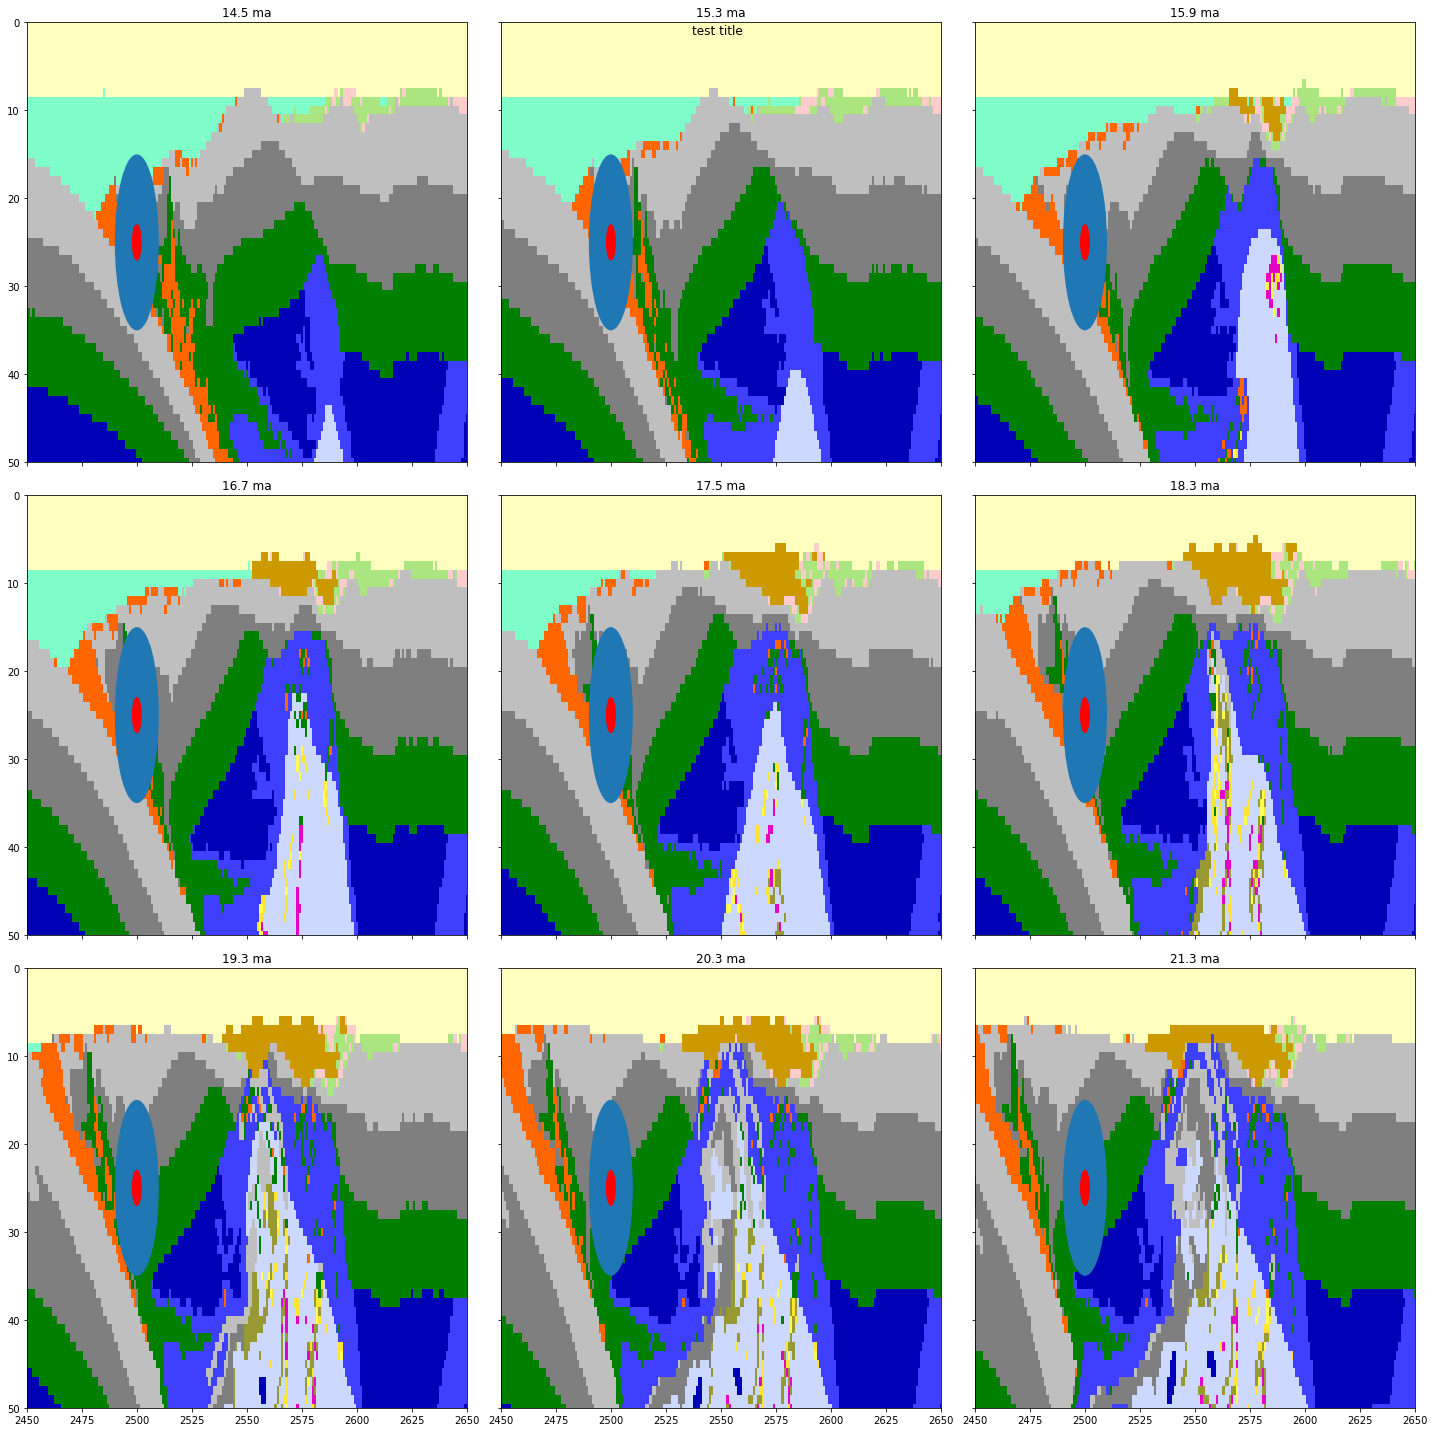

In [29]:
draw_voacc(res, time, 'width', 'depth', {'xlim': (2450, 2650), 'ylim': (0, 50)}, C_map, ncols = 3, nrows = 3)


##### circle = patches.Circle((2500, 50), radius = 10)
circle2 = patches.Circle((2500, 50),radius = 2, color = 'r')
ax.add_patch(circle)
ax.add_patch(circle2)